<a href="https://colab.research.google.com/github/mrsferret/Machine-Learning-ITNPBD6-/blob/main/Session8_CRISP_recap_jupyter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The notebook follows all the steps of CRISP-DM for our worked example.

The section numbers (8.3, 8.4...) can be ignored; they refer to page numbers in the purely online version of this course.

In this example we'll be using a mixture of Pandas and Numpy to hold the data. We have done this once or twice before but it's covered again here because you'll often see the pattern followed elsewhere. (for e.g. large numerical data sets numpy will usually be faster than pandas so many tend to use numpy and convert to/from pandas as needed)


# 8.3. Business Understanding

This is not specific to the tool. We're trying to answer these general questions:
* What are we trying to achieve?
* What is the context?
* What does a “good solution” look like?

See the notes for discussion around these questions!

So, here, we'll jump to the next stage:

# 8.4. Data Understanding

Having satisfied ourselves that the data is all in one place and is well formatted (a single CSV), we consider:

* What variables or features are there?
* Is there any chance they are of use?
* How much data is there?

We'll now try to answer the questions above. It might also help to consider these more specific questions:

* Is the data well formatted?
* Does it require linking across multiple sources?
* What variables are there?
* Is there any chance they are of use?
* How much data is there?

In [ ]:
# load data
import pandas as pd

import numpy as np
df=pd.read_csv("aircraft.csv")

In [ ]:
# before we start looking at the data, let's do train/test split
# so the test data remains "unseen"
# we could do this after conversion to numpy arrays
# but it's more convenient to do some of the data cleaning in a DataFrame
# so we'll keep the data in that form for now.
# this is another way to do a data split...
df_copy = df.copy()
df_train = df_copy.sample(frac=0.75, random_state=0)
df_test = df_copy.drop(df_train.index)

In [ ]:
# take a look at the raw data (Data Table in Orange)
df_train

,depArr,distance,distance_long,operation_mode,angle_sum,NDepDep,NDepArr,NArrDep,NArrArr,Pressure,VisibilityInMeters,isRain,isSnow,flightNumber,airline,aircraftModel,AvgSpdLast10,TaxiTime
663,0,2511.565984,1078.779413,1,650.98,2,0,0,0,29.97,10000,1,0,EW4341,EWG,A319,217.467038,14.900000
156,0,1080.097017,822.871797,1,551.73,1,0,0,0,29.74,10000,0,0,FR3501,RYR,B738,274.998229,10.883333
2404,0,1865.387974,530.889143,1,678.99,2,0,0,0,30.21,10000,0,0,FR4776,RYR,B738,227.644766,14.083333
2421,0,1848.770881,949.049038,1,358.57,4,0,0,0,30.21,10000,0,0,FR553,RYR,B738,185.743636,10.800000
1158,0,2377.031859,1417.437268,1,602.85,2,0,0,0,29.23,10000,0,0,VS73,VIR,B744,222.574200,8.766667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1873,0,1870.598543,866.249197,1,535.55,2,0,0,0,30.24,10000,0,0,KL1074,KLM,B737,190.750982,8.583333
2138,0,2916.556436,2360.897125,1,603.29,3,0,0,0,30.24,10000,0,0,NaN,FDX,B752,310.462709,15.433333
798,0,1699.682899,583.754621,1,293.31,4,2,0,0,30.09,10000,0,0,U21927,EZY,A319,237.580459,9.466667
1870,0,1436.617433,885.746676,1,180.09,1,0,0,0,30.24,8000,0,0,EK22,UAE,A388,223.291679,16.716667


In [ ]:
# data types and summary stats...
# "include=all" is needed to include all columns, otherwise we'll just get stats for numeric ones
# here, we can see that depArr has 4 values (a little suspicous); operation_mode has a mean of 1.0 std (standard deviation) of 0.0, and min/max of 1.0, so it's all 1 value.
df_train.describe(include="all")

,depArr,distance,distance_long,operation_mode,angle_sum,NDepDep,NDepArr,NArrDep,NArrArr,Pressure,VisibilityInMeters,isRain,isSnow,flightNumber,airline,aircraftModel,AvgSpdLast10,TaxiTime
count,2264,2264.000000,2264.000000,2264.0,2264.000000,2264.000000,2264.000000,2264.00000,2264.000000,2264.000000,2264.000000,2264.000000,2264.000000,2217,2253,2264,2264.000000,2264.000000
unique,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,590,50,34,NaN,NaN
top,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EK20,RYR,B738,NaN,NaN
freq,1624,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,497,702,NaN,NaN
mean,NaN,1917.138090,942.034737,1.0,541.751749,1.331714,0.172703,0.39576,0.068021,29.908342,9689.001767,0.155035,0.001325,NaN,NaN,NaN,249.921337,9.875155
std,NaN,641.297590,525.025721,0.0,185.879098,1.491748,0.445666,1.01020,0.276910,0.278520,1083.022102,0.362018,0.036386,NaN,NaN,NaN,55.731496,5.915558
min,NaN,355.282084,0.000000,1.0,89.970000,0.000000,0.000000,0.00000,0.000000,29.230000,2200.000000,0.000000,0.000000,NaN,NaN,NaN,97.656837,0.366667
25%,NaN,1560.752463,655.085138,1.0,410.810000,0.000000,0.000000,0.00000,0.000000,29.680000,10000.000000,0.000000,0.000000,NaN,NaN,NaN,211.823811,5.612500
50%,NaN,1889.939429,977.407659,1.0,519.500000,1.000000,0.000000,0.00000,0.000000,29.940000,10000.000000,0.000000,0.000000,NaN,NaN,NaN,245.884014,9.233333
75%,NaN,2422.047245,1345.315855,1.0,651.060000,2.000000,0.000000,0.00000,0.000000,30.180000,10000.000000,0.000000,0.000000,NaN,NaN,NaN,283.566409,13.050000


In [ ]:
# count the nulls/missing data in each column
# not too bad - we might need to fill/delete these rows later
df_train.isnull().sum()

depArr                 0
distance               0
distance_long          0
operation_mode         0
angle_sum              0
NDepDep                0
NDepArr                0
NArrDep                0
NArrArr                0
Pressure               0
VisibilityInMeters     0
isRain                 0
isSnow                 0
flightNumber          47
airline               11
aircraftModel          0
AvgSpdLast10           0
TaxiTime               0
dtype: int64

array([[<Axes: title={'center': 'distance'}>,
        <Axes: title={'center': 'distance_long'}>,
        <Axes: title={'center': 'operation_mode'}>,
        <Axes: title={'center': 'angle_sum'}>],
       [<Axes: title={'center': 'NDepDep'}>,
        <Axes: title={'center': 'NDepArr'}>,
        <Axes: title={'center': 'NArrDep'}>,
        <Axes: title={'center': 'NArrArr'}>],
       [<Axes: title={'center': 'Pressure'}>,
        <Axes: title={'center': 'VisibilityInMeters'}>,
        <Axes: title={'center': 'isRain'}>,
        <Axes: title={'center': 'isSnow'}>],
       [<Axes: title={'center': 'AvgSpdLast10'}>,
        <Axes: title={'center': 'TaxiTime'}>, <Axes: >, <Axes: >]],
      dtype=object)

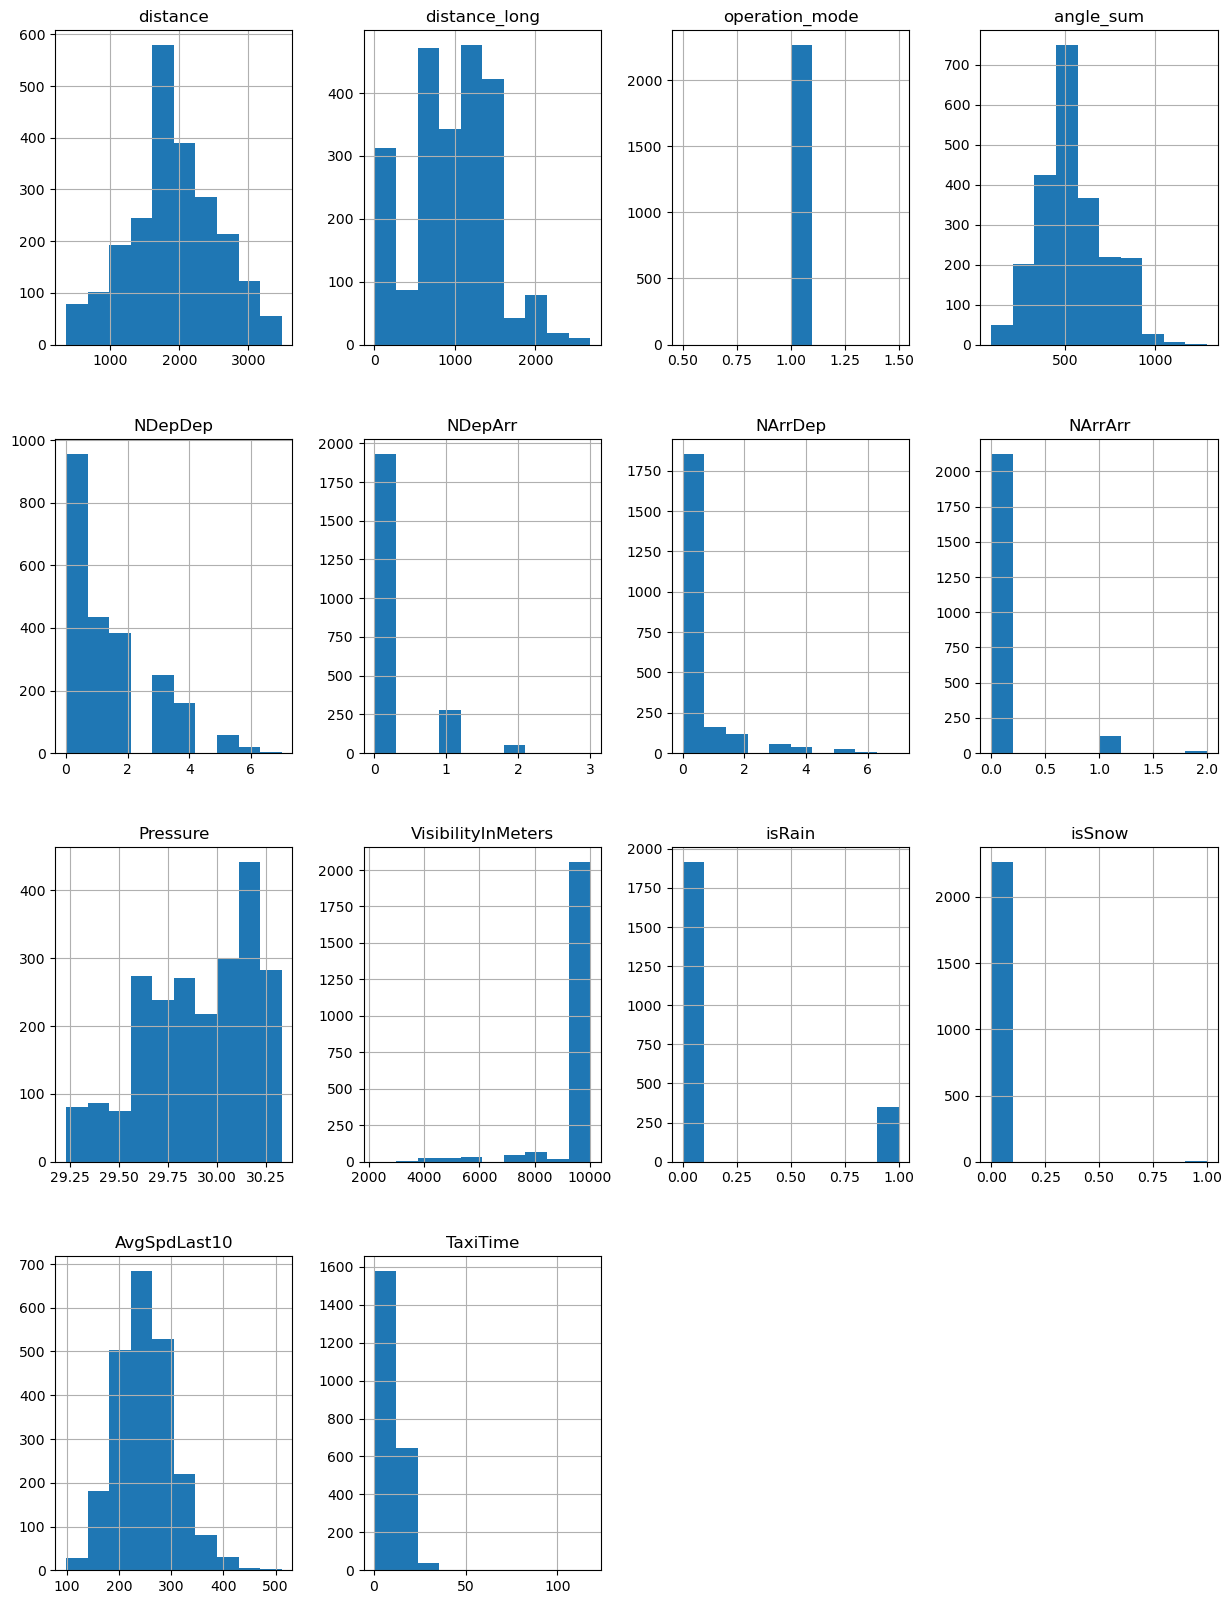

In [ ]:
# Plot distributions...
df_train.hist(figsize = (15,20))

<Axes: xlabel='depArr'>

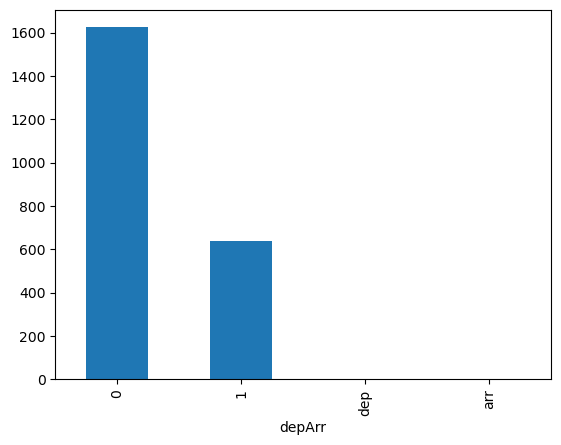

In [ ]:
#...okay, we can see some issues with these distributions. Can you spot them?

# NOTE: we are also missing some variables. Those are
# the non-numeric ones: depArr; flightNumber; airline; aircraftModel
# There's not really an easy way to handle these,
# so we'll try a bar plot one at a time for them:
df_train['depArr'].value_counts().plot(kind='bar')

depArr


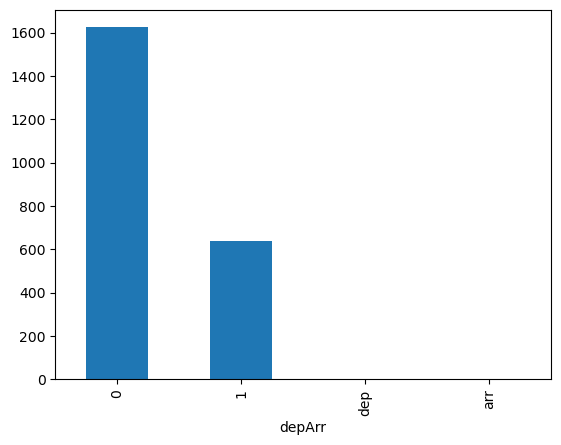

flightNumber


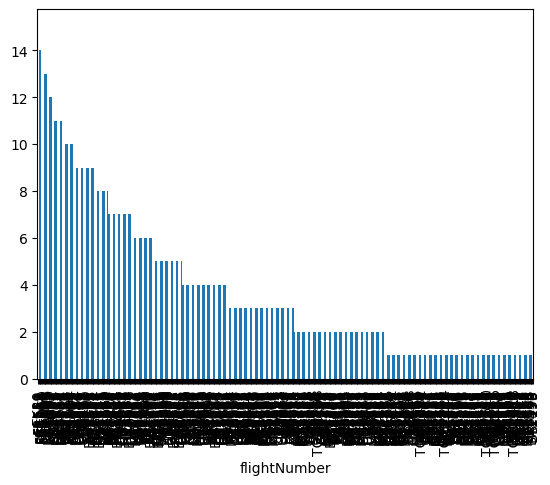

airline


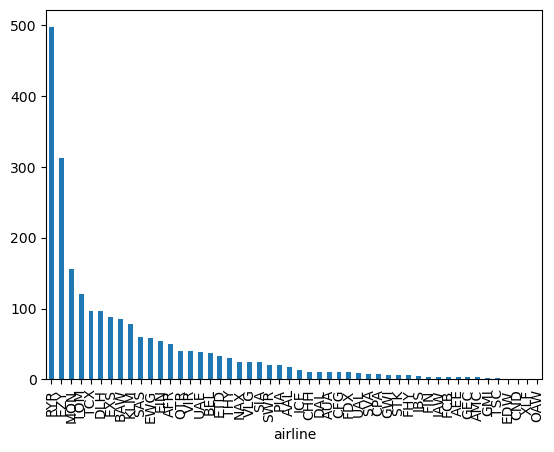

aircraftModel


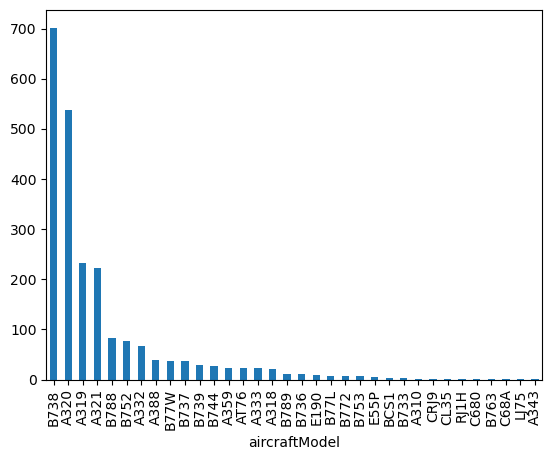

In [ ]:
# this will list the non-numeric columns...
#df.select_dtypes(include=object)

# so loop over all of them; count each unique value, and plot...
import matplotlib.pyplot as plt
for col in df_train.select_dtypes(include=object).columns:
    print(col)
    df_train[col].value_counts().plot(kind='bar')
    plt.show()

In [ ]:
# at this point we can discard obviously useless variables.
# I've chosen flightNumber, airline and aircraftModel - can you think why?
#
# We might also use some other feature ranking approaches; having settled on
# our desired features, we select them by just referring to the data frame
# using a list of the features names we want:

# define the list
selected_features = ['depArr', 'distance', 'distance_long', 'angle_sum',
       'NDepDep', 'NDepArr', 'NArrDep', 'NArrArr', 'Pressure',
       'isRain', 'isSnow', 'AvgSpdLast10']

# how to use it
df_train[selected_features]

,depArr,distance,distance_long,angle_sum,NDepDep,NDepArr,NArrDep,NArrArr,Pressure,isRain,isSnow,AvgSpdLast10
663,0,2511.565984,1078.779413,650.98,2,0,0,0,29.97,1,0,217.467038
156,0,1080.097017,822.871797,551.73,1,0,0,0,29.74,0,0,274.998229
2404,0,1865.387974,530.889143,678.99,2,0,0,0,30.21,0,0,227.644766
2421,0,1848.770881,949.049038,358.57,4,0,0,0,30.21,0,0,185.743636
1158,0,2377.031859,1417.437268,602.85,2,0,0,0,29.23,0,0,222.574200
...,...,...,...,...,...,...,...,...,...,...,...,...
1873,0,1870.598543,866.249197,535.55,2,0,0,0,30.24,0,0,190.750982
2138,0,2916.556436,2360.897125,603.29,3,0,0,0,30.24,0,0,310.462709
798,0,1699.682899,583.754621,293.31,4,2,0,0,30.09,0,0,237.580459
1870,0,1436.617433,885.746676,180.09,1,0,0,0,30.24,0,0,223.291679


# 8.5. Data Preparation
Now on to cleaning the data...

<AxesSubplot:>

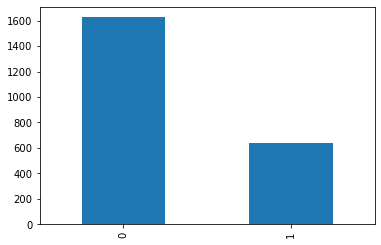

In [ ]:
# The histogram showed us depArr had some 'dep' and 'arr' values, which we'll map to 0 and 1
# we can use a dictionary to set up the mapping...
df_train['depArr'] = df_train['depArr'].replace({'dep':'0','arr':'1'})

# just to check it's worked...
df_train['depArr'].value_counts().plot(kind='bar')

In [ ]:
# we'll also select only the rows where taxi time is <= 30 mins
df_train=df_train.loc[df_train['TaxiTime'] <= 30]

In [ ]:
# now we can map to numpy arrays
X_train = df_train[selected_features].values
y_train = df_train['TaxiTime'].values

In [ ]:
# normalise...
from sklearn.preprocessing import MinMaxScaler

mm_scaler = MinMaxScaler()
X_train = mm_scaler.fit_transform(X_train)

In [ ]:
X_train

array([[0.        , 0.68947378, 0.40266342, ..., 1.        , 0.        ,
        0.28931283],
       [0.        , 0.23176025, 0.30714377, ..., 0.        , 0.        ,
        0.42823682],
       [0.        , 0.48285776, 0.1981588 , ..., 0.        , 0.        ,
        0.31388959],
       ...,
       [0.        , 0.42987341, 0.21789129, ..., 0.        , 0.        ,
        0.3378819 ],
       [0.        , 0.34575798, 0.33061234, ..., 0.        , 0.        ,
        0.30337793],
       [1.        , 0.3797565 , 0.19210264, ..., 1.        , 0.        ,
        0.57683357]])

Based on the histograms and bar plots above, are there any other values that might need correcting? Can you try to fix them?

# 8.6. Modelling
On to the modelling stage...

First, we'll try just creating a list of different models, and looping over them, trying each on in turn.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import model_selection

# make a list of models to try...
# you could have multiple copies of each model to try different hyperparameters here
models = []
models.append(('LR', LinearRegression()))
models.append(('MLP', MLPRegressor(max_iter=500)))
models.append(('RF', RandomForestRegressor()))

# now we loop over the models
# this is the equivalent of test+score in Orange
# this is just a standard "for" loop - you could extend with your own search over features or hyperparameters here
# or replace with e.g. GridSearchCV

seed = 7 # this makes the "random" elements of the training process predictable. You can change it to any integer value see what effect that has.
scoring = 'r2' # we'll be using the r^2 cost function; you can also provide a function here if you want to customise!
results = [] # empty list to store results in
names = [] # empty list to store the names of the model
for name, model in models: # "models" is a list of 2-element lists; for each list in "models", copy the first element into a variable called "name" and the second into a variable called "model"
    kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=seed) # kFold is an object that does all the work of splitting the data repeatedly (internally it's a list of split versions of the data, in the form of train/validation pairs)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring) # this takes each of the folds of the data in kFold, and trains/validates the model on them. The result is a list of scores - r2 in this case - one score for each fold.
    results.append(cv_results) #We add this list of scores to the "results" list
    names.append(name) # we add the name of the current model to the "names" list (each item in the names list will match the set of scores in the results list)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()) # for the current model, print the mean and standard deviation of the scores from all folds
    print(msg)

LR: 0.517162 (0.038724)


/home/oldchap/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP: 0.520652 (0.036977)
RF: 0.541639 (0.042189)


That's all fine, but it's a bit annoying to write out all the configurations by hand. We can also do a grid search to explore hyperparameters, using a built-in sklearn function like this:

In [ ]:
from sklearn.model_selection import GridSearchCV

rf = RandomForestRegressor()

param_grid = {'n_estimators':[50, 100, 200], 'max_features':[2,4,8]}

gs = GridSearchCV(rf, param_grid)

gs.fit(X_train, y_train)

The full set of results from the search can be found here:

In [ ]:
gs.cv_results_

More useful, though, is to get the best model, like this:

In [ ]:
bestModel = gs.best_estimator_
print(bestModel)
print(gs.best_score_)
print(gs.best_params_)

# you could then use bestModel in place of making a new "rf" further below too.

If grid search takes too long (too many hyperparameters to explore) then random search allows you to look at a smaller number of combinations. It works in much the same way:

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
rs = RandomizedSearchCV(rf, param_grid, n_iter=3)
rs.fit(X_train, y_train)


In [ ]:
bestModel = rs.best_estimator_
print(bestModel)
print(rs.best_score_)
print(rs.best_params_)

Having found our best model and hyperparameter configuration, we now train that model on all the training data so that it is ready for testing in the Evaluation stage...

In [ ]:
# Let's fit our best model to all of the training data and apply to the test data...
# you set the hyperparameters here too.
rf = RandomForestRegressor(max_features=8, n_estimators=200)
rf.fit(X_train, y_train)

# 8.7. Evaluation

In [ ]:
# corrections and normalisation that we applied to the training data also need applied to the test data
# (normalisation uses the same lower/upper bounds as for the training data, by using the same mm_scaler object)
# BUT we do not drop outliers here as in practice we might only be making predictions one at a time
df_test['depArr'] = df_test['depArr'].replace({'dep':'0','arr':'1'})
X_test = df_test[selected_features].values
y_test = df_test['TaxiTime'].values
X_test = mm_scaler.transform(X_test)

y_pred = rf.predict(X_test)

In [ ]:
y_pred

In [ ]:
# how close are the predictions?
from sklearn import metrics
print("r2:", metrics.r2_score(y_test, y_pred))
print("MSE:", metrics.mean_squared_error(y_test, y_pred))


# how many under 1 min, 3 mins?
#predDifferences = abs(y_pred - y_test)
#np.where(predDifferences < 3)
predDifferences = abs(np.subtract(y_pred, y_test).ravel())
print("Fraction < 1min:", len(np.where(predDifferences < 1)[0]) / len(y_test))
print("Fraction < 3min:", len(np.where(predDifferences < 3)[0]) / len(y_test))

# distributions
hist, bins = np.histogram(predDifferences, bins=range(0,15,1))
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)

# 8.8. Deployment
One example! We might just pass the model configuration details (type, hyperparameters etc.) to a software developer who will integrate with a bigger system.

In [ ]:
# save model
import pickle
pickle.dump(rf, open("savedmodel.sav", 'wb'))

# some time later...
# load the model from disk
rf2 = pickle.load(open("savedmodel.sav", 'rb'))
pred = rf2.predict(X_test)

...and we're done. Monitor the model in deployment and we might go back to improve it further as needed.